In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ast import literal_eval
import warnings
import networkx as nx

# Suppress specific warnings
# warnings.filterwarnings("ignore", message="A NumPy version >=")
warnings.filterwarnings("ignore", message="have mixed types")

In [4]:
# Load data with memory optimization
dtypes = {
    'user_id': 'category',
    'movie_id': 'category',
    'rating_id': 'category',
    'rating_score': 'float64',
    'movie_title': 'str',
    'movie_release_year': 'int',
    'director_name': 'str',
    'user_trialist': 'bool',
    'user_subscriber': 'bool',
    'user_eligible_for_trial': 'bool',
    'user_has_payment_method': 'bool'
}
# DATA_DIR = '/kaggle/input/mubi-sqlite-database-for-movie-lovers/'
DATA_DIR = 'data/'

In [5]:
ratings = pd.read_csv(DATA_DIR + 'mubi_ratings_data.csv', parse_dates=['rating_timestamp_utc'])
print(ratings.shape)
columns_to_drop = ['rating_url', 'critic', 'critic_likes', 'critic_comments']
ratings = ratings.drop(columns=columns_to_drop)
ratings = ratings.dropna(subset=['user_trialist', 'user_subscriber', 'user_eligible_for_trial', 'user_has_payment_method'])
ratings = ratings.astype({k: v for k, v in dtypes.items() if k in ratings.columns})
print(ratings.shape)
print(ratings.info())
print(ratings.head())

/var/folders/5g/2tcry58x5170kjbn7zq7gp900000gn/T/ipykernel_99865/1635905372.py:1: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(DATA_DIR + 'mubi_ratings_data.csv', parse_dates=['rating_timestamp_utc'])


(15520005, 13)
(15520002, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 15520002 entries, 0 to 15520004
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   movie_id                 category      
 1   rating_id                category      
 2   rating_score             float64       
 3   rating_timestamp_utc     datetime64[ns]
 4   user_id                  category      
 5   user_trialist            bool          
 6   user_subscriber          bool          
 7   user_eligible_for_trial  bool          
 8   user_has_payment_method  bool          
dtypes: bool(4), category(3), datetime64[ns](1), float64(1)
memory usage: 1.2 GB
None
  movie_id rating_id  rating_score rating_timestamp_utc   user_id  \
0     1066  15610495           3.0  2017-06-10 12:38:33  41579158   
1     1066  10704606           2.0  2014-08-15 23:42:31  85981819   
2     1066  10177114           2.0  2014-01-30 13:21:57   4208563   
3    

In [6]:
movies = pd.read_csv(DATA_DIR + 'mubi_movie_data.csv', low_memory=False)
print(movies.shape)
columns_to_drop = ['movie_url', 'movie_title_language', 'movie_image_url', 'director_url']
movies = movies.drop(columns=columns_to_drop)
movies = movies.dropna(subset=['movie_release_year', 'director_name'])
movies = movies.astype({k: v for k, v in dtypes.items() if k in movies.columns})
print(movies.shape)
print(movies.info())
print(movies.head())

(226575, 10)
(226567, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 226567 entries, 0 to 226574
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   movie_id            226567 non-null  category
 1   movie_title         226567 non-null  object  
 2   movie_release_year  226567 non-null  int64   
 3   movie_popularity    226567 non-null  int64   
 4   director_id         226567 non-null  object  
 5   director_name       226567 non-null  object  
dtypes: category(1), int64(2), object(3)
memory usage: 21.0+ MB
None
  movie_id                  movie_title  movie_release_year  movie_popularity  \
0        1                    La Antena                2007               105   
1        2         Elementary Particles                2006                23   
2        3                  It's Winter                2006                21   
3        4  Kirikou and the Wild Beasts                2005          

In [7]:
user_ratings = pd.read_csv(DATA_DIR + 'mubi_ratings_user_data.csv', low_memory=False, parse_dates=['rating_date_utc'])
print(user_ratings.shape)
columns_to_drop = ['user_avatar_image_url', 'user_cover_image_url']
user_ratings = user_ratings.drop(columns=columns_to_drop)
user_ratings = user_ratings.dropna(subset=['user_trialist', 'user_subscriber', 'user_eligible_for_trial', 'user_has_payment_method'])
user_ratings = user_ratings.astype({k: v for k, v in dtypes.items() if k in user_ratings.columns})
print(user_ratings.shape)
print(user_ratings.info())
print(user_ratings.head())

(4297641, 8)
(4297638, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 4297638 entries, 0 to 4297640
Data columns (total 6 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  category      
 1   rating_date_utc          datetime64[ns]
 2   user_trialist            bool          
 3   user_subscriber          bool          
 4   user_eligible_for_trial  bool          
 5   user_has_payment_method  bool          
dtypes: bool(4), category(1), datetime64[ns](1)
memory usage: 117.9 MB
None
    user_id rating_date_utc  user_trialist  user_subscriber  \
0  41579158      2017-06-10          False            False   
1  68654088      2012-10-02          False            False   
2  84114365      2010-12-25          False            False   
3  29755671      2010-11-15          False            False   
4  93302487      2010-01-05          False            False   

   user_eligible_for_trial  user_has_payment_method 

In [8]:
lists = pd.read_csv(DATA_DIR + 'mubi_lists_data.csv', parse_dates=['list_update_timestamp_utc', 'list_creation_timestamp_utc'], converters={'list_movies': literal_eval})
print(lists.shape)
columns_to_drop = ['list_description', 'list_url', 'list_comments', 'list_title', 'list_cover_image_url',
                      'list_first_image_url', 'list_second_image_url', 'list_third_image_url']
lists = lists.drop(columns=columns_to_drop)
# lists = lists.dropna(subset=[''])
print(lists.shape)
print(lists.info())
print(lists.head())

(80311, 14)
(80311, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80311 entries, 0 to 80310
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   user_id                      80311 non-null  int64         
 1   list_id                      80311 non-null  int64         
 2   list_movie_number            80311 non-null  int64         
 3   list_update_timestamp_utc    80311 non-null  datetime64[ns]
 4   list_creation_timestamp_utc  80311 non-null  datetime64[ns]
 5   list_followers               80311 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 3.7 MB
None
    user_id  list_id  list_movie_number list_update_timestamp_utc  \
0  85981819     1969                250       2019-11-26 03:20:17   
1  85981819     3946                181       2020-05-01 05:54:39   
2  85981819     6683                179       2020-04-12 08:31:35   
3  85981819

/var/folders/5g/2tcry58x5170kjbn7zq7gp900000gn/T/ipykernel_99865/333736713.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


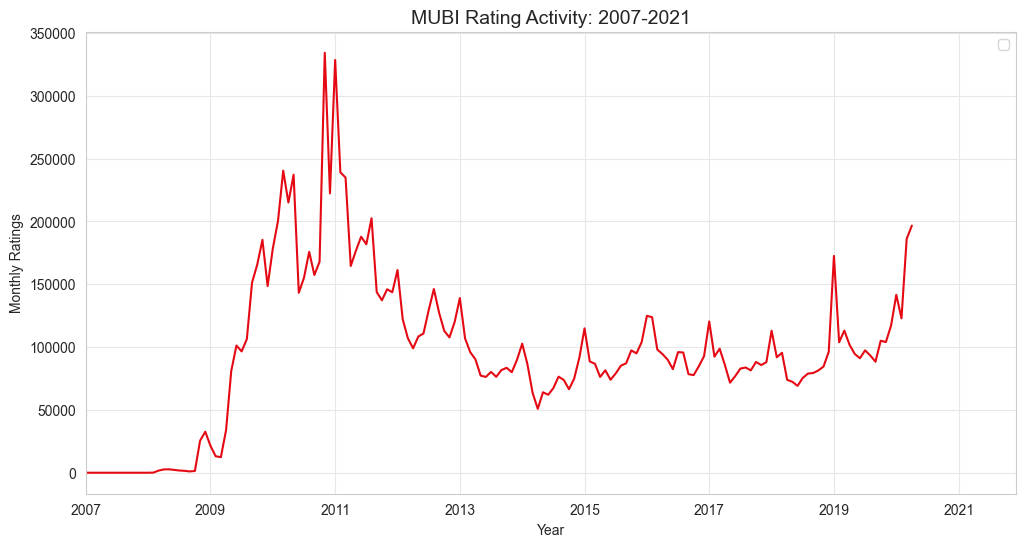

In [9]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid", {'grid.color': '#e7e7e7'})
ratings.resample('ME', on='rating_timestamp_utc').size().plot(color='#E50914')
plt.title("MUBI Rating Activity: 2007-2021", fontsize=14)
plt.xlabel("Year"); plt.ylabel("Monthly Ratings")
plt.xlim([datetime(2007, 1, 1),datetime(2021, 12, 31)])
# plt.axvline('2019-03', color='grey', linestyle='--', label='COVID Restrictions Lifted')
plt.legend()
plt.savefig("Rating Activity")

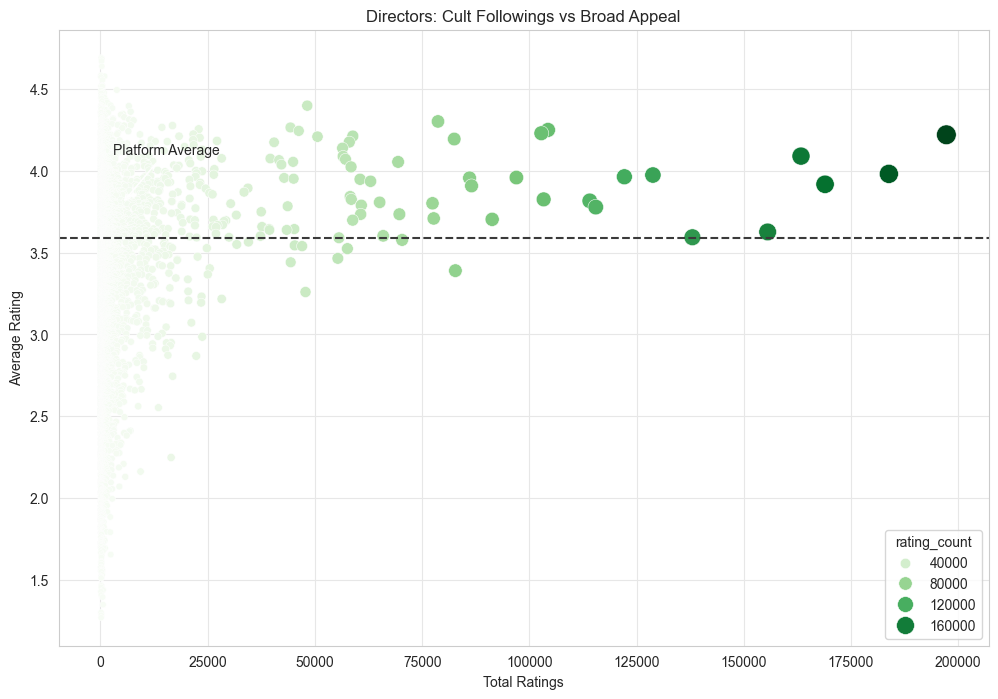

In [10]:
merged = ratings.merge(movies, on='movie_id')  # Key relationship
director_ratings = merged.groupby('director_name').agg(
    avg_rating=('rating_score','mean'),
    rating_count=('user_id','count')
).query('rating_count > 100').sort_values('avg_rating', ascending=False)

plt.figure(figsize=(12,8))
sns.scatterplot(data=director_ratings, x='rating_count', y='avg_rating', 
               size='rating_count', hue='rating_count',
               sizes=(20, 200), palette='Greens')
plt.axhline(y=merged['rating_score'].mean(), color='#3A3A3A', linestyle='--')
plt.annotate('Platform Average', (5000,3.8), 
            xytext=(3000,4.1), arrowprops=dict(arrowstyle='->'))
plt.xlabel('Total Ratings')
plt.ylabel('Average Rating')
plt.title("Directors: Cult Followings vs Broad Appeal")
plt.savefig("Directors")

<Figure size 1200x600 with 0 Axes>

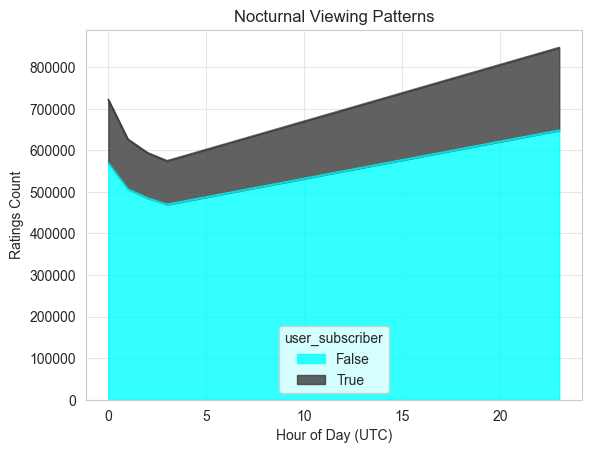

In [11]:
ratings['hour'] = ratings['rating_timestamp_utc'].dt.hour
night_mask = (ratings['hour'] > 22) | (ratings['hour'] < 4)
night_ratings = ratings[night_mask].groupby(['user_subscriber', 'hour']).size().unstack(0)

plt.figure(figsize=(12,6))
night_ratings.plot(kind='area', alpha=0.8, color=['#00FFFF', '#3A3A3A'])
plt.title("Nocturnal Viewing Patterns")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Ratings Count")
plt.savefig("View Patterns")

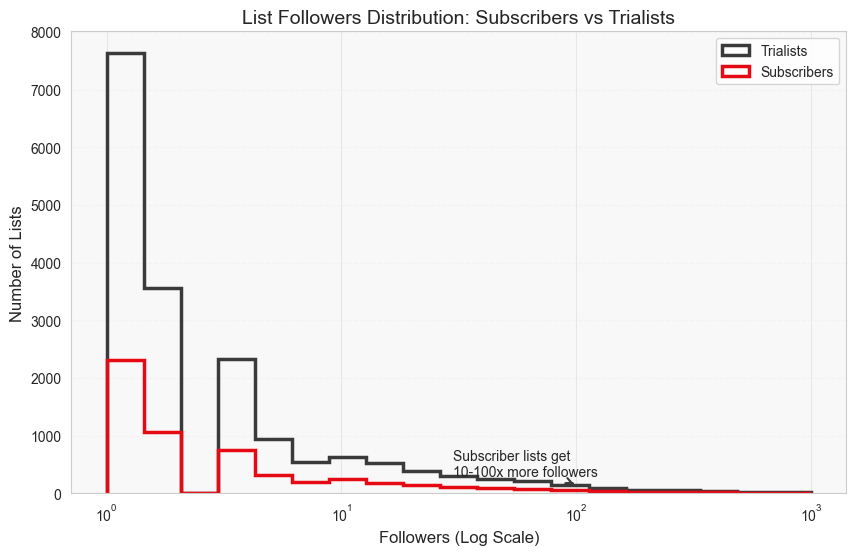

In [12]:
# Memory optimization: convert to categorical and filter before merge
lists_filtered = lists[['user_id', 'list_followers']].copy()
lists_filtered = lists_filtered[lists_filtered['list_followers'] > 0]  # Filter out 0 followers

# Only select necessary columns from user_ratings
user_sub_status = user_ratings[['user_id','user_subscriber']].drop_duplicates()

# Efficient merge using pandas merge with 'inner' join
active_lists = pd.merge(
    lists_filtered, 
    user_sub_status,
    on='user_id',
    how='inner'
)

# Use matplotlib directly for better memory management
plt.figure(figsize=(10,6))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Plot each group separately instead of using seaborn
subscribers = active_lists[active_lists['user_subscriber']]
trialists = active_lists[~active_lists['user_subscriber']]

# Create histogram bins
bins = np.logspace(0, 3, 20)  # 1 to 1000 in 20 log steps

# Plot with custom styling
plt.hist(
    [subscribers['list_followers'], trialists['list_followers']], 
    bins=bins,
    color=['#E50914', '#3A3A3A'],
    histtype='step',
    linewidth=2.5,
    label=['Subscribers', 'Trialists']
)

# Add annotations for key insights
plt.annotate('Subscriber lists get\n10-100x more followers', 
            xy=(100, 150), xytext=(30, 300),
            arrowprops=dict(arrowstyle='->', color='#3A3A3A', lw=1.5),
            fontsize=10)

# Add visual enhancements 
plt.xscale('log')
plt.xlabel('Followers (Log Scale)', fontsize=12)
plt.ylabel('Number of Lists', fontsize=12)
plt.title("List Followers Distribution: Subscribers vs Trialists", fontsize=14)
plt.legend(frameon=True, framealpha=0.8)

# Set background color for consistency with other plots
plt.gca().set_facecolor('#f8f8f8')
plt.savefig("Lists")

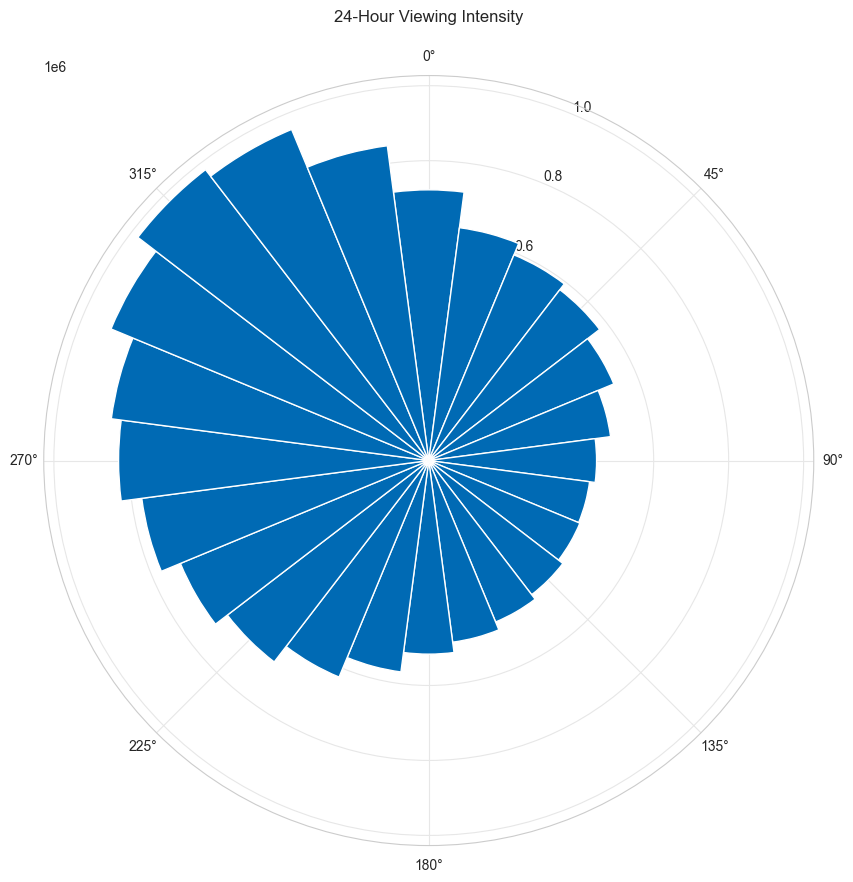

In [13]:
# Circular timeline
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
hours = ratings['rating_timestamp_utc'].dt.hour.value_counts().sort_index()

bars = ax.bar(np.deg2rad(hours.index*15), hours.values, 
             color='#006AB4', width=np.deg2rad(15))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title("24-Hour Viewing Intensity", pad=20)
plt.savefig("Circular")